In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

bab8e9a7b164e679844406a0cccddb0399630326

key='bab8e9a7b164e679844406a0cccddb0399630326'

In [3]:
df=pd.read_csv('AAPL.csv')

In [4]:
len(df)

10409

In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
10404,2022-03-18,160.509995,164.479996,159.759995,163.979996,163.979996,123351200
10405,2022-03-21,163.509995,166.350006,163.009995,165.380005,165.380005,95811400
10406,2022-03-22,165.509995,169.419998,164.910004,168.820007,168.820007,81532000
10407,2022-03-23,167.990005,172.639999,167.649994,170.210007,170.210007,98062700
10408,2022-03-24,171.059998,174.139999,170.210007,174.070007,174.070007,90018700


In [6]:
df1=df.reset_index()['Close']

In [7]:
df1

0          0.128348
1          0.121652
2          0.112723
3          0.115513
4          0.118862
            ...    
10404    163.979996
10405    165.380005
10406    168.820007
10407    170.210007
10408    174.070007
Name: Close, Length: 10409, dtype: float64

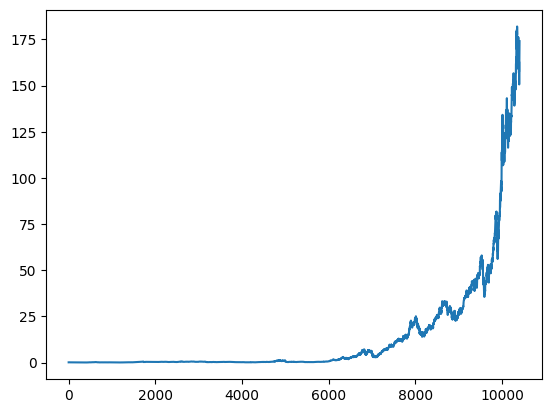

In [8]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [9]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [10]:
df1.shape

(10409, 1)

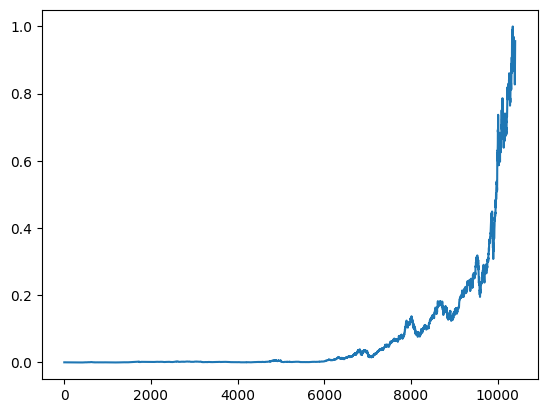

In [11]:
plt.plot(df1)

In [12]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [13]:
len(df1)

10409

In [14]:
training_size,test_size

(6765, 3644)

In [15]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)


In [16]:
time_step=100
X_train,y_train=create_dataset(train_data,time_step)
X_test,ytest=create_dataset(test_data,time_step)

In [17]:
print(X_train.shape),print(y_train.shape)

(6664, 100)
(6664,)


(None, None)

In [18]:
print(X_test.shape),print(ytest.shape)

(3543, 100)
(3543,)


(None, None)

In [19]:
X_train

array([[0.00043548, 0.00039868, 0.00034961, ..., 0.00042322, 0.00042015,
        0.00040175],
       [0.00039868, 0.00034961, 0.00036495, ..., 0.00042015, 0.00040175,
        0.00041095],
       [0.00034961, 0.00036495, 0.00038335, ..., 0.00040175, 0.00041095,
        0.00041708],
       ...,
       [0.02035073, 0.02070794, 0.02079823, ..., 0.02979545, 0.02971498,
        0.03005454],
       [0.02070794, 0.02079823, 0.02107301, ..., 0.02971498, 0.03005454,
        0.02985237],
       [0.02079823, 0.02107301, 0.0211947 , ..., 0.03005454, 0.02985237,
        0.03041568]])

In [20]:
X_train.shape

(6664, 100)

In [21]:
X_train.shape[0]

6664

In [22]:
X_train.shape[1]

100

In [23]:
# rehape input to be [samples,time steps,features] which is required for LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [24]:
X_train.shape

(6664, 100, 1)

In [25]:
#stacked LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [26]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

In [27]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [29]:
history=model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
105/105 [==============================] - 16s 62ms/step - loss: 1.5442e-05 - val_loss: 0.0038
Epoch 2/100
105/105 [==============================] - 5s 46ms/step - loss: 2.4171e-07 - val_loss: 0.0049
Epoch 3/100
105/105 [==============================] - 4s 43ms/step - loss: 2.5748e-07 - val_loss: 0.0048
Epoch 4/100
105/105 [==============================] - 4s 42ms/step - loss: 3.0927e-07 - val_loss: 0.0049
Epoch 5/100
105/105 [==============================] - 5s 43ms/step - loss: 2.1903e-07 - val_loss: 0.0051
Epoch 6/100
105/105 [==============================] - 4s 43ms/step - loss: 2.6923e-07 - val_loss: 0.0043
Epoch 7/100
105/105 [==============================] - 5s 43ms/step - loss: 2.2559e-07 - val_loss: 0.0045
Epoch 8/100
105/105 [==============================] - 4s 42ms/step - loss: 3.0432e-07 - val_loss: 0.0053
Epoch 9/100
105/105 [==============================] - 4s 41ms/step - loss: 2.5097e-07 - val_loss: 0.0044
Epoch 10/100
105/105 [=======================

In [31]:
model.save_weights('apple.h5')

In [32]:
## Doing the predection and checking the performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

111/111 [==============================] - 2s 16ms/step


In [33]:
# transform to orignal form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


In [34]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.9884815862590445

In [35]:
math.sqrt(mean_squared_error(ytest,test_predict))

51.2496682347935

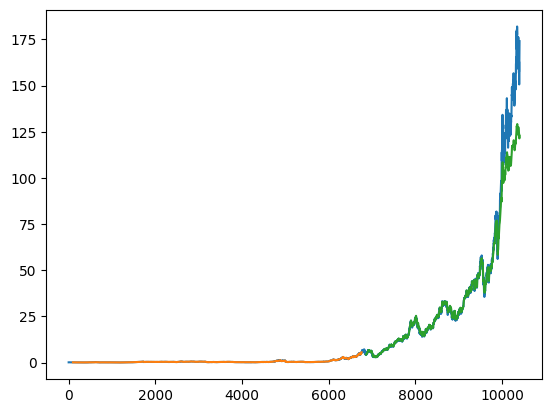

In [33]:
# plotting
#shift train predictions for plotting
look_back=100
trainPredictPlot=np.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:]=train_predict
#shift rest predictions for plotting
testPredictPlot=np.empty_like(df1)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict
#plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [34]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 3303)

In [35]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [36]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<100):
    if(len(temp_input)>30):
        # Use only the last 'n_steps' inputs
        x_input=np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print("{} day output".format(i,yhat))  
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

print(lst_output)


0 day input [0.81836763 0.82419304 0.8322717  0.829359   0.83111758 0.82650121
 0.8285346  0.81265206 0.81237726 0.82402817 0.8240831  0.82957879
 0.84326308 0.86733413 0.88206261 0.88464559 0.88678891 0.88970161
 0.86150872 0.88035896 0.90816712 0.90525441 0.89970372 0.88915201
 0.90827706 0.9404817  0.96191493 0.95905715 0.98593105 0.9655421
 0.95779317 0.98510673 0.94641706 0.94026191 0.93262291 0.95042896
 0.9649925  0.96850974 0.99076729 0.98505172 0.9855464  0.97906145
 0.97559922 1.         0.98730498 0.9610356  0.94498821 0.94592246
 0.9460324  0.96191493 0.96438797 0.9460324  0.95086863 0.93289771
 0.91327807 0.90382549 0.89228459 0.88794295 0.87783091 0.87733632
 0.87475334 0.93581042 0.96026621 0.95933195 0.96609162 0.94993429
 0.94713152 0.94311969 0.96054101 0.96850974 0.94564766 0.92652269
 0.92784169 0.94932976 0.94801085 0.92784169 0.9191585  0.90278137
 0.8794247  0.89409818 0.90569408 0.90717785 0.89662615 0.91509166
 0.91327807 0.89646128 0.875193   0.86497102 0.8952

In [37]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [38]:
len(df1)

10409

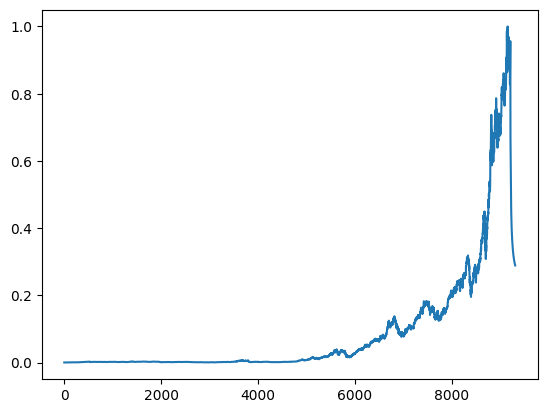

In [39]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

ValueError: x and y must have same first dimension, but have shapes (30,) and (100, 1)

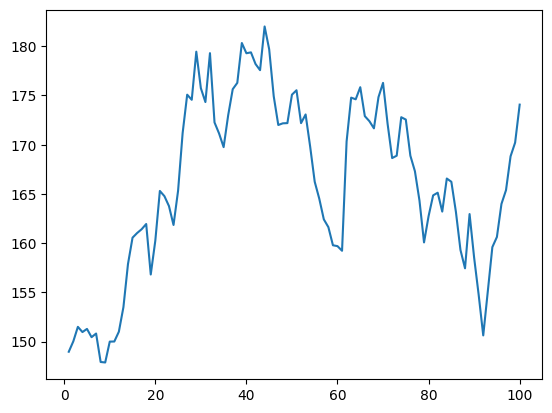

In [40]:
plt.plot(day_new,scaler.inverse_transform(df1[10309:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(ytest, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(ytest, y_pred)
r2 = r2_score(ytest, y_pred)

In [ ]:
print("Mean Squared Error (MSE): {:.2f}".format(mse))
print("Root Mean Squared Error (RMSE): {:.2f}".format(rmse))
print("Mean Absolute Error (MAE): {:.2f}".format(mae))
print("R^2 Score: {:.2f}".format(r2))